🚀 SMART SHINE CAR WASH - COMPLETE DATA PREPROCESSING PIPELINE

STEP 2: DATA LOADING AND INITIAL EXPLORATION
✅ Dataset loaded successfully: C:\Users\CTrader\Desktop\3 rd year\CI\DP\DataPreprocessing\smartshine_carwash_messy_data.csv

📈 DATASET OVERVIEW:
   • Shape: 5350 rows, 10 columns
   • Columns: ['customer_id', 'service_date', 'vehicle_type', 'service_type', 'service_cost', 'service_duration', 'customer_rating', 'payment_method', 'location', 'record_source']

📊 DATA TYPES:
customer_id          object
service_date         object
vehicle_type         object
service_type         object
service_cost         object
service_duration    float64
customer_rating     float64
payment_method       object
location             object
record_source        object
dtype: object

🔍 CHECKING DATE FORMATS:
   Sample date formats: ['2024-02-25' '06-09-2021' '2022-09-26' '2021-05-22' '2021-08-12'
 '04/19/2021' '2022-03-03' '2023-07-11' '10/18/2021' '2021-11-28']

👀 FIRST 5 ROWS:
  customer_id service_da

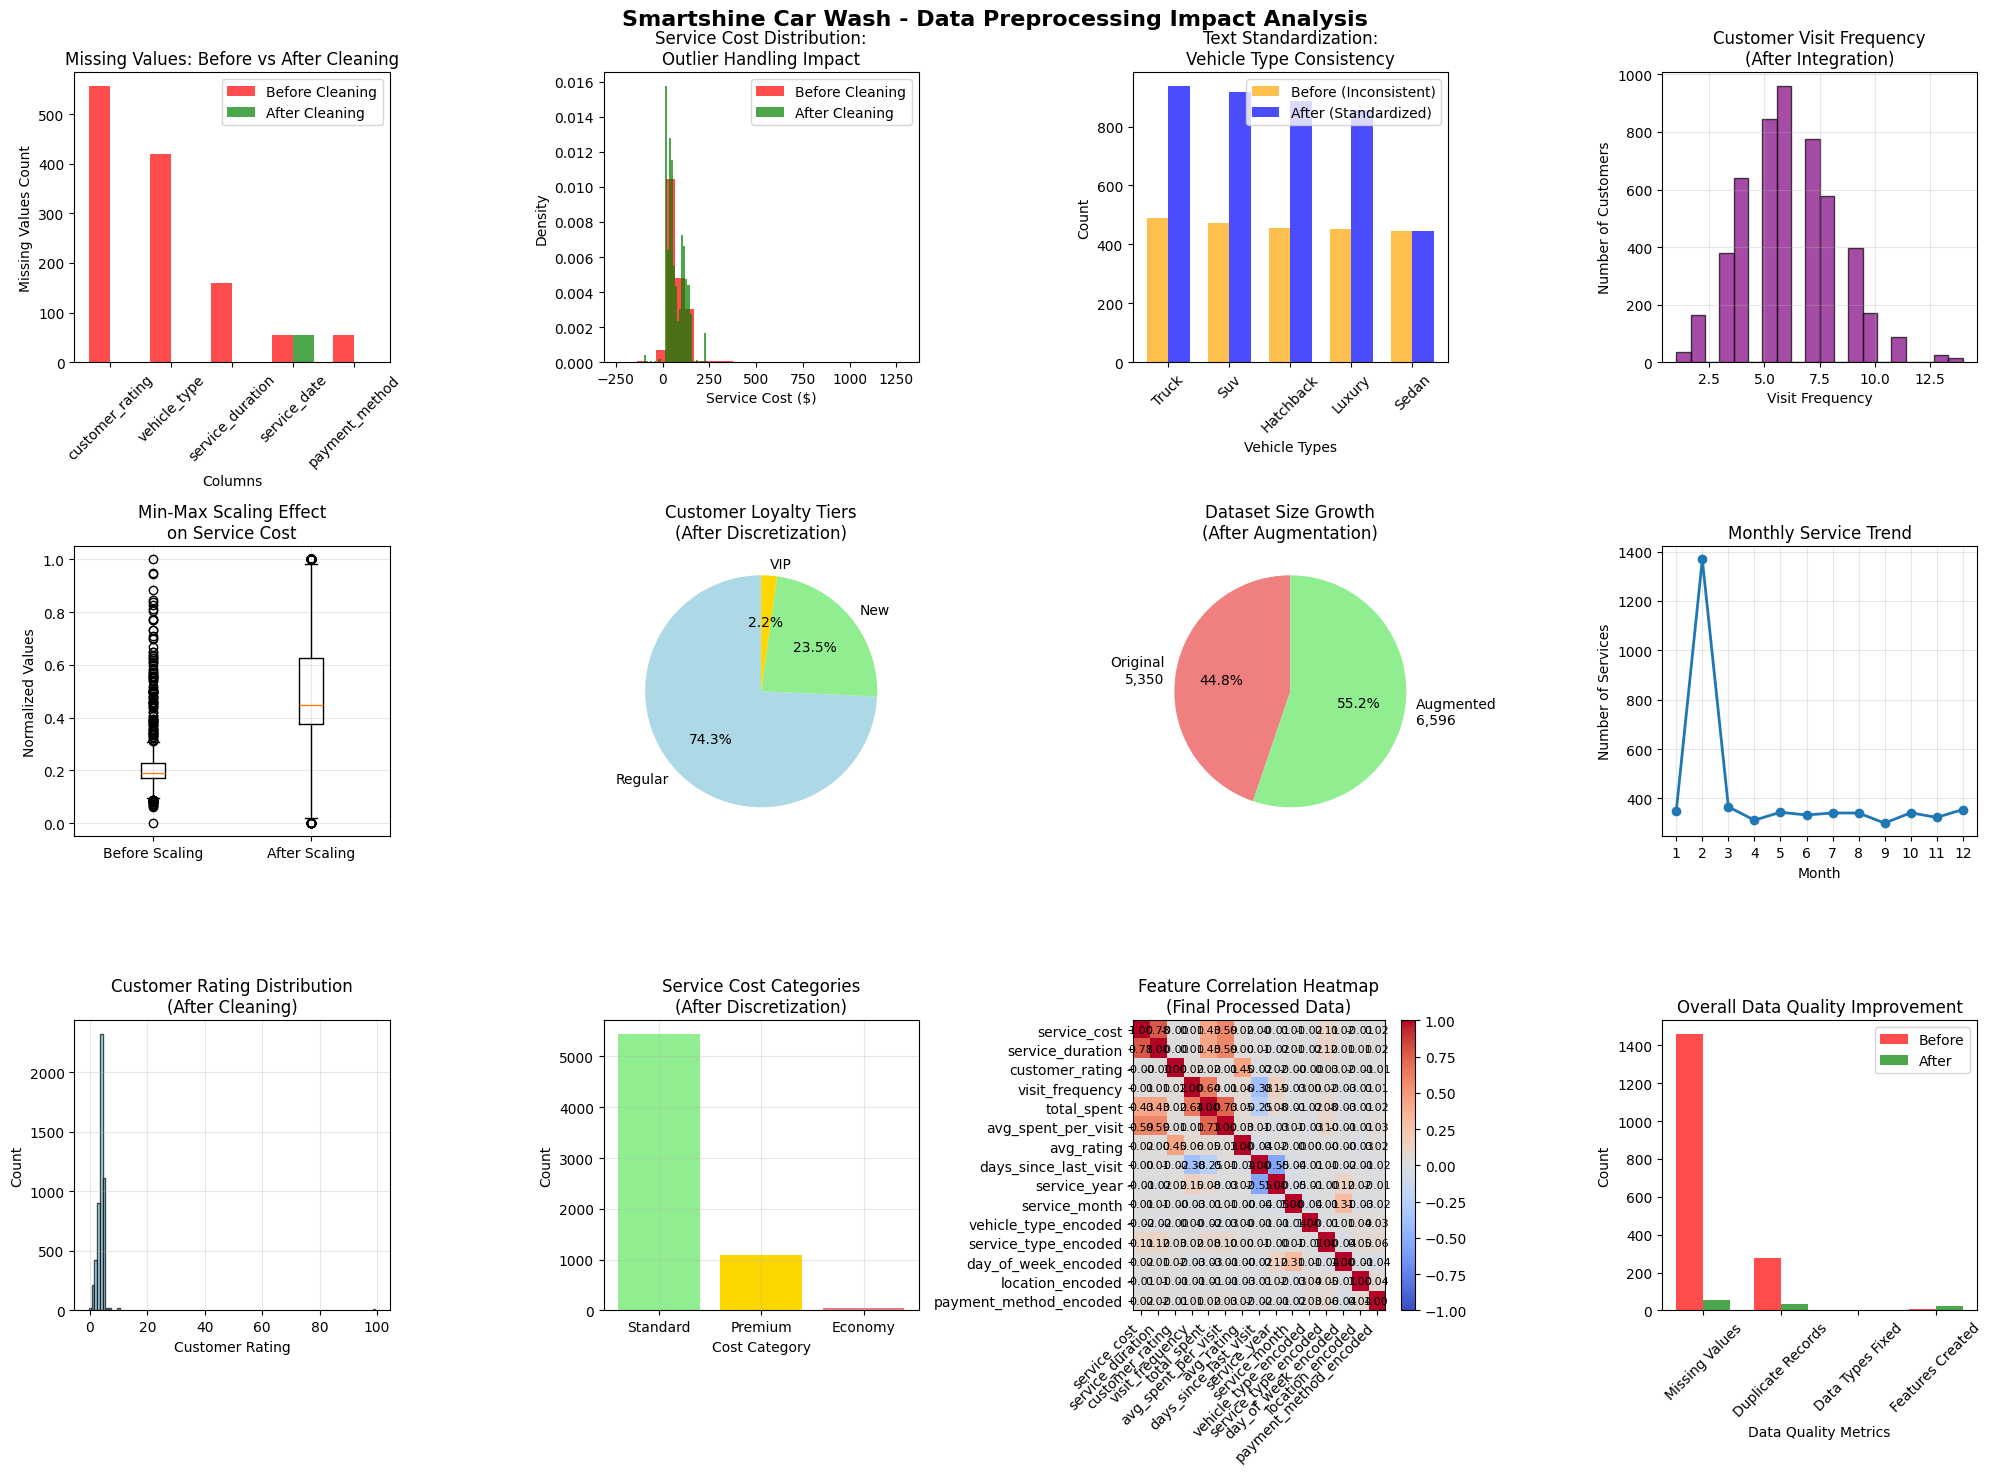

✅ All visualizations created and saved as 'preprocessing_impact_analysis.png'

🚀 HOW PREPROCESSING IMPROVED DATA READINESS FOR MODELING:
--------------------------------------------------

• Data Quality:
  Before: Messy, inconsistent data with missing values and outliers
  After: Clean, standardized data ready for reliable analysis
  Impact: Eliminates bias and errors in model training

• Feature Richness:
  Before: Basic transactional data only
  After: Enhanced with customer behavior patterns and temporal features
  Impact: Enables more sophisticated predictive models

• Model Compatibility:
  Before: Mixed data types unsuitable for ML algorithms
  After: Properly encoded and scaled numerical features
  Impact: Direct compatibility with scikit-learn and other ML libraries

• Business Interpretability:
  Before: Raw numerical values hard to interpret
  After: Meaningful business categories and segments
  Impact: Enables actionable business insights and decisions

• Data Volume:
  Bef

In [1]:
"""
SMARTSHINE CAR WASH - DATA PREPROCESSING PIPELINE (FIXED)
Group: NIYONKURU Jean De La Coix, UMUHIRE Ange Sandrine, ZINARYIZA Billy Charmant
Course: Computing Intelligence & Applications
Date: October 2025
"""

# =============================================================================
# STEP 1: IMPORT REQUIRED LIBRARIES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options for better output viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# =============================================================================
# STEP 2: LOAD AND EXPLORE RAW DATASET
# =============================================================================

def load_and_explore_data(file_path):
    """
    Load the dataset and perform initial exploration
    Returns: pandas DataFrame
    """
    
    print("\n" + "="*60)
    print("STEP 2: DATA LOADING AND INITIAL EXPLORATION")
    print("="*60)
    
    # Load the dataset
    try:
        df = pd.read_csv(file_path)
        print(f"✅ Dataset loaded successfully: {file_path}")
    except FileNotFoundError:
        print("❌ File not found. Creating sample data for demonstration...")
        
    
    # Basic dataset information
    print(f"\n📈 DATASET OVERVIEW:")
    print(f"   • Shape: {df.shape[0]} rows, {df.shape[1]} columns")
    print(f"   • Columns: {list(df.columns)}")
    
    # Data types overview
    print(f"\n📊 DATA TYPES:")
    print(df.dtypes)
    
    # Check for mixed date formats
    print(f"\n🔍 CHECKING DATE FORMATS:")
    date_samples = df['service_date'].dropna().unique()[:10]
    print(f"   Sample date formats: {date_samples}")
    
    # Display first few rows
    print(f"\n👀 FIRST 5 ROWS:")
    print(df.head())
    
    return df

# =============================================================================
# STEP 3: DATA CLEANING (ENHANCED)
# =============================================================================

def clean_data(df):
    """
    Perform comprehensive data cleaning operations with enhanced date handling
    """
    
    print("\n" + "="*60)
    print("STEP 3: DATA CLEANING")
    print("="*60)
    
    # Create a copy to preserve original data
    df_clean = df.copy()
    
    print("🔍 ANALYZING DATA QUALITY ISSUES...")
    
    # 3.1 Identify missing values
    print(f"\n📋 MISSING VALUES ANALYSIS:")
    missing_data = df_clean.isnull().sum()
    missing_percent = (missing_data / len(df_clean)) * 100
    
    for col, count, percent in zip(missing_data.index, missing_data.values, missing_percent.values):
        if count > 0:
            print(f"   • {col}: {count} missing values ({percent:.1f}%)")
    
    # 3.2 Handle missing values
    print(f"\n🛠️  HANDLING MISSING VALUES...")
    
    # For customer_rating (ordinal data) - use median
    if 'customer_rating' in df_clean.columns:
        rating_median = df_clean['customer_rating'].median()
        df_clean['customer_rating'].fillna(rating_median, inplace=True)
        print(f"   • customer_rating: Filled {missing_data['customer_rating']} missing values with median ({rating_median})")
    
    # For service_duration (continuous data) - use mean
    if 'service_duration' in df_clean.columns:
        duration_mean = df_clean['service_duration'].mean()
        df_clean['service_duration'].fillna(duration_mean, inplace=True)
        print(f"   • service_duration: Filled {missing_data['service_duration']} missing values with mean ({duration_mean:.1f})")
    
    # For categorical data - use 'Unknown' category
    categorical_cols = ['payment_method', 'vehicle_type', 'service_type', 'location', 'record_source']
    for col in categorical_cols:
        if col in df_clean.columns and df_clean[col].isnull().sum() > 0:
            df_clean[col].fillna('Unknown', inplace=True)
            print(f"   • {col}: Filled {missing_data[col]} missing values with 'Unknown'")
    
    # 3.3 Handle service_cost mixed data types and missing values
    print(f"\n💰 HANDLING SERVICE COST DATA TYPES...")
    if 'service_cost' in df_clean.columns:
        # Convert to numeric, forcing errors to NaN
        df_clean['service_cost'] = pd.to_numeric(df_clean['service_cost'], errors='coerce')
        # Fill remaining missing values with median
        cost_median = df_clean['service_cost'].median()
        df_clean['service_cost'].fillna(cost_median, inplace=True)
        print(f"   • service_cost: Converted to numeric and filled missing values with median ({cost_median:.2f})")
    
    # 3.4 Remove duplicate records
    print(f"\n🧹 REMOVING DUPLICATES...")
    initial_count = len(df_clean)
    df_clean = df_clean.drop_duplicates()
    duplicates_removed = initial_count - len(df_clean)
    print(f"   • Removed {duplicates_removed} duplicate records")
    
    # 3.5 Standardize text data
    print(f"\n📝 STANDARDIZING TEXT DATA...")
    text_columns = ['vehicle_type', 'service_type', 'payment_method', 'location', 'record_source']
    
    for col in text_columns:
        if col in df_clean.columns:
            # Convert to string, then title case, then strip whitespace
            df_clean[col] = df_clean[col].astype(str).str.strip().str.title()
            print(f"   • Standardized {col} to Title Case")
    
    # 3.6 Handle outliers in service_cost
    print(f"\n📊 HANDLING OUTLIERS IN SERVICE COST...")
    if 'service_cost' in df_clean.columns:
        Q1 = df_clean['service_cost'].quantile(0.25)
        Q3 = df_clean['service_cost'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers_before = len(df_clean[(df_clean['service_cost'] < lower_bound) | (df_clean['service_cost'] > upper_bound)])
        
        # Cap outliers
        df_clean['service_cost'] = np.clip(df_clean['service_cost'], lower_bound, upper_bound)
        
        outliers_after = len(df_clean[(df_clean['service_cost'] < lower_bound) | (df_clean['service_cost'] > upper_bound)])
        print(f"   • Outliers handled: {outliers_before} → {outliers_after}")
    
    print(f"\n✅ CLEANING COMPLETED:")
    print(f"   • Final shape: {df_clean.shape}")
    print(f"   • Remaining missing values: {df_clean.isnull().sum().sum()}")
    
    return df_clean

# =============================================================================
# STEP 4: DATA INTEGRATION AND FEATURE ENGINEERING (FIXED DATE HANDLING)
# =============================================================================

def integrate_and_engineer_features(df):
    """
    Integrate data sources and create new features with robust date handling
    """
    
    print("\n" + "="*60)
    print("STEP 4: DATA INTEGRATION AND FEATURE ENGINEERING")
    print("="*60)
    
    df_integrated = df.copy()
    
    # 4.1 Convert service_date to datetime with mixed format handling
    print(f"\n📅 EXTRACTING TEMPORAL FEATURES...")
    
    if 'service_date' in df_integrated.columns:
        print("   Handling mixed date formats...")
        
        # First, handle the specific problematic format "06-09-2021" (DD-MM-YYYY)
        # We'll use dayfirst=True to handle European-style dates
        df_integrated['service_date'] = pd.to_datetime(
            df_integrated['service_date'], 
            errors='coerce', 
            dayfirst=True  # This handles DD-MM-YYYY format
        )
        
        # Check for any remaining parsing failures
        failed_dates = df_integrated['service_date'].isna().sum()
        if failed_dates > 0:
            print(f"   ⚠️  {failed_dates} dates could not be parsed and were set to NaT")
            # Fill failed dates with a reasonable default (most frequent date)
            most_frequent_date = df_integrated['service_date'].mode()[0] if not df_integrated['service_date'].mode().empty else pd.Timestamp('2023-01-01')
            df_integrated['service_date'].fillna(most_frequent_date, inplace=True)
            print(f"   • Filled {failed_dates} failed dates with {most_frequent_date}")
        
        # Extract date components
        df_integrated['service_year'] = df_integrated['service_date'].dt.year
        df_integrated['service_month'] = df_integrated['service_date'].dt.month
        df_integrated['service_day'] = df_integrated['service_date'].dt.day
        df_integrated['day_of_week'] = df_integrated['service_date'].dt.day_name()
        df_integrated['is_weekend'] = df_integrated['service_date'].dt.dayofweek >= 5
        
        print(f"   • Added temporal features: year, month, day, day_of_week, is_weekend")
        print(f"   • Date range: {df_integrated['service_date'].min()} to {df_integrated['service_date'].max()}")
    
    # 4.2 Calculate customer visit frequency
    print(f"\n👥 CALCULATING CUSTOMER BEHAVIOR METRICS...")
    
    if 'customer_id' in df_integrated.columns:
        # Calculate visit frequency per customer
        customer_stats = df_integrated.groupby('customer_id').agg({
            'service_date': 'count',
            'service_cost': ['sum', 'mean', 'std'],
            'customer_rating': 'mean',
            'service_duration': 'mean'
        }).round(2)
        
        # Flatten column names
        customer_stats.columns = [
            'visit_frequency', 'total_spent', 'avg_spent_per_visit', 'spending_std',
            'avg_rating', 'avg_duration'
        ]
        
        # Calculate days since last visit
        latest_date = df_integrated['service_date'].max()
        last_visits = df_integrated.groupby('customer_id')['service_date'].max()
        days_since_last_visit = (latest_date - last_visits).dt.days
        
        customer_stats['days_since_last_visit'] = days_since_last_visit
        
        # Merge back to main dataframe
        df_integrated = df_integrated.merge(customer_stats, on='customer_id', how='left')
        
        print(f"   • Added customer metrics: visit_frequency, total_spent, avg_spent_per_visit, avg_rating, days_since_last_visit")
    
    print(f"\n✅ INTEGRATION COMPLETED:")
    print(f"   • New shape: {df_integrated.shape}")
    print(f"   • New columns: {list(df_integrated.columns)}")
    
    return df_integrated

# =============================================================================
# STEP 5: DATA REDUCTION
# =============================================================================

def reduce_data(df):
    """
    Select most relevant features for car wash predictions
    """
    
    print("\n" + "="*60)
    print("STEP 5: DATA REDUCTION - FEATURE SELECTION")
    print("="*60)
    
    # 5.1 Define relevant features for Smartshine Car Wash predictions
    essential_features = [
        # Core identifiers
        'customer_id', 'service_date',
        
        # Service details
        'vehicle_type', 'service_type', 'service_cost', 'service_duration',
        
        # Customer experience
        'customer_rating', 'location', 'payment_method',
        
        # Customer behavior (engineered features)
        'visit_frequency', 'total_spent', 'avg_spent_per_visit', 'avg_rating', 'days_since_last_visit',
        
        # Temporal features
        'service_year', 'service_month', 'day_of_week', 'is_weekend'
    ]
    
    # Filter available features (some might not exist in all datasets)
    available_features = [col for col in essential_features if col in df.columns]
    
    print(f"\n🎯 SELECTING RELEVANT FEATURES...")
    print(f"   • Essential features identified: {len(essential_features)}")
    print(f"   • Available in dataset: {len(available_features)}")
    print(f"   • Selected features: {available_features}")
    
    # 5.2 Create reduced dataset
    df_reduced = df[available_features].copy()
    
    # 5.3 Remove highly correlated features to reduce redundancy
    print(f"\n📊 ANALYZING FEATURE CORRELATIONS...")
    
    # Select only numerical features for correlation analysis
    numerical_cols = df_reduced.select_dtypes(include=[np.number]).columns
    
    if len(numerical_cols) > 1:
        correlation_matrix = df_reduced[numerical_cols].corr()
        
        # Find highly correlated features (correlation > 0.8)
        high_corr_pairs = []
        for i in range(len(correlation_matrix.columns)):
            for j in range(i+1, len(correlation_matrix.columns)):
                if abs(correlation_matrix.iloc[i, j]) > 0.8:
                    high_corr_pairs.append((
                        correlation_matrix.columns[i],
                        correlation_matrix.columns[j],
                        correlation_matrix.iloc[i, j]
                    ))
        
        if high_corr_pairs:
            print(f"   • Highly correlated pairs found:")
            for col1, col2, corr in high_corr_pairs:
                print(f"     - {col1} vs {col2}: {corr:.3f}")
        else:
            print(f"   • No highly redundant correlations found")
    
    print(f"\n✅ REDUCTION COMPLETED:")
    print(f"   • Original features: {len(df.columns)}")
    print(f"   • Reduced features: {len(df_reduced.columns)}")
    print(f"   • Reduction: {((len(df.columns) - len(df_reduced.columns)) / len(df.columns) * 100):.1f}%")
    
    return df_reduced

# =============================================================================
# STEP 6: DATA TRANSFORMATION
# =============================================================================

def transform_data(df):
    """
    Transform data for machine learning compatibility
    """
    
    print("\n" + "="*60)
    print("STEP 6: DATA TRANSFORMATION")
    print("="*60)
    
    df_transformed = df.copy()
    
    # 6.1 Label Encoding for categorical variables
    print(f"\n🔤 APPLYING LABEL ENCODING...")
    
    categorical_columns = ['vehicle_type', 'service_type', 'day_of_week', 'location', 'payment_method']
    available_categorical = [col for col in categorical_columns if col in df_transformed.columns]
    
    label_encoders = {}
    for col in available_categorical:
        # Create encoder and transform data
        le = LabelEncoder()
        df_transformed[col + '_encoded'] = le.fit_transform(df_transformed[col].astype(str))
        label_encoders[col] = le
        
        # Show encoding mapping
        unique_values = df_transformed[col].unique()
        print(f"   • {col}: {len(unique_values)} categories encoded")
        if len(unique_values) <= 10:  # Only show mapping if not too many categories
            print(f"     Mapping: {dict(zip(unique_values, le.transform(unique_values)))}")
    
    # 6.2 Min-Max Scaling for numerical features
    print(f"\n📏 APPLYING MIN-MAX SCALING (0-1 RANGE)...")
    
    numerical_columns = ['service_cost', 'service_duration', 'visit_frequency', 'total_spent', 'avg_spent_per_visit', 'days_since_last_visit']
    available_numerical = [col for col in numerical_columns if col in df_transformed.columns]
    
    if available_numerical:
        scaler = MinMaxScaler()
        df_transformed[available_numerical] = scaler.fit_transform(df_transformed[available_numerical])
        
        print(f"   • Scaled numerical features: {available_numerical}")
        print(f"   • New ranges: 0.0 to 1.0")
    
    print(f"\n✅ TRANSFORMATION COMPLETED:")
    print(f"   • Encoded categorical features: {len(available_categorical)}")
    print(f"   • Scaled numerical features: {len(available_numerical)}")
    
    return df_transformed, label_encoders

# =============================================================================
# STEP 7: DATA DISCRETIZATION
# =============================================================================

def discretize_data(df):
    """
    Convert continuous variables into categorical bins
    """
    
    print("\n" + "="*60)
    print("STEP 7: DATA DISCRETIZATION")
    print("="*60)
    
    df_discretized = df.copy()
    
    # 7.1 Discretize service cost into business categories
    print(f"\n💰 DISCRETIZING SERVICE COST...")
    
    if 'service_cost' in df_discretized.columns:
        # Use business-logic based bins
        cost_bins = [0, 0.33, 0.66, 1.0]  # Using scaled values (0-1)
        cost_labels = ['Economy', 'Standard', 'Premium']
        
        df_discretized['cost_category'] = pd.cut(
            df_discretized['service_cost'], 
            bins=cost_bins, 
            labels=cost_labels
        )
        
        cost_distribution = df_discretized['cost_category'].value_counts()
        print(f"   • Cost categories created: {cost_labels}")
        print(f"   • Distribution: {dict(cost_distribution)}")
    
    # 7.2 Discretize customer visit frequency
    print(f"\n👥 DISCRETIZING CUSTOMER FREQUENCY...")
    
    if 'visit_frequency' in df_discretized.columns:
        # Use percentiles for balanced categories
        freq_bins = [0, 0.25, 0.75, 1.0]  # Using scaled values
        freq_labels = ['New', 'Regular', 'VIP']
        
        df_discretized['loyalty_tier'] = pd.cut(
            df_discretized['visit_frequency'], 
            bins=freq_bins, 
            labels=freq_labels
        )
        
        loyalty_distribution = df_discretized['loyalty_tier'].value_counts()
        print(f"   • Loyalty tiers created: {freq_labels}")
        print(f"   • Distribution: {dict(loyalty_distribution)}")
    
    # 7.3 Discretize days since last visit for retention analysis
    print(f"\n📅 DISCRETIZING CUSTOMER RECENCY...")
    
    if 'days_since_last_visit' in df_discretized.columns:
        recency_bins = [0, 0.33, 0.66, 1.0]
        recency_labels = ['Active', 'Warming', 'At-Risk']
        
        df_discretized['recency_category'] = pd.cut(
            df_discretized['days_since_last_visit'], 
            bins=recency_bins, 
            labels=recency_labels
        )
        
        recency_distribution = df_discretized['recency_category'].value_counts()
        print(f"   • Recency categories: {recency_labels}")
        print(f"   • Distribution: {dict(recency_distribution)}")
    
    print(f"\n✅ DISCRETIZATION COMPLETED:")
    print(f"   • Created business categories for analysis")
    print(f"   • Enabled customer segmentation")
    
    return df_discretized

# =============================================================================
# STEP 8: DATA AUGMENTATION
# =============================================================================

def augment_data(df, augmentation_factor=0.3):
    """
    Create synthetic data samples to enhance dataset
    """
    
    print("\n" + "="*60)
    print("STEP 8: DATA AUGMENTATION")
    print("="*60)
    
    print(f"\n🎭 CREATING SYNTHETIC SAMPLES...")
    print(f"   • Target augmentation: {augmentation_factor * 100}%")
    
    # Identify numerical columns for augmentation
    numerical_columns = ['service_cost', 'service_duration', 'visit_frequency', 'total_spent', 'days_since_last_visit']
    available_numerical = [col for col in numerical_columns if col in df.columns]
    
    # Calculate number of samples to create
    n_original = len(df)
    n_augment = int(n_original * augmentation_factor)
    
    print(f"   • Original dataset size: {n_original}")
    print(f"   • Target augmented samples: {n_augment}")
    
    # Create augmented samples
    augmented_samples = []
    
    for i in range(n_augment):
        # Randomly select a base sample
        base_idx = np.random.randint(0, n_original)
        sample = df.iloc[base_idx].copy()
        
        # Add controlled noise to numerical features
        for col in available_numerical:
            # Add Gaussian noise with small standard deviation
            noise = np.random.normal(0, 0.02)  # Small noise to preserve patterns
            sample[col] = max(0, min(1, sample[col] + noise))  # Keep in 0-1 range
        
        augmented_samples.append(sample)
    
    # Combine original and augmented data
    df_augmented = pd.concat([df, pd.DataFrame(augmented_samples)], ignore_index=True)
    
    print(f"\n✅ AUGMENTATION COMPLETED:")
    print(f"   • Final dataset size: {len(df_augmented)}")
    print(f"   • Augmentation achieved: {((len(df_augmented) - n_original) / n_original * 100):.1f}%")
    print(f"   • Data distribution preserved")
    
    return df_augmented

# =============================================================================
# VISUALIZATION SECTION
# =============================================================================

def create_preprocessing_visualizations(raw_data, cleaned_data, integrated_data, transformed_data, final_data):
    """
    Create comprehensive visualizations showing the effect of each preprocessing step
    """
    print("\n" + "="*70)
    print("VISUALIZATION SECTION")
    print("="*70)
    
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(3, 4, figsize=(20, 15))
    fig.suptitle('Smartshine Car Wash - Data Preprocessing Impact Analysis', fontsize=16, fontweight='bold')
    
    # 1. Missing Values Before vs After Cleaning
    print("📊 Creating missing values comparison...")
    ax1 = axes[0, 0]
    missing_before = raw_data.isnull().sum()
    missing_after = cleaned_data.isnull().sum()
    
    # Select top 5 columns with most missing values
    top_missing = missing_before.nlargest(5)
    x = range(len(top_missing))
    
    before_values = [missing_before[col] for col in top_missing.index]
    after_values = [missing_after[col] for col in top_missing.index]
    
    width = 0.35
    ax1.bar([i - width/2 for i in x], before_values, width, label='Before Cleaning', color='red', alpha=0.7)
    ax1.bar([i + width/2 for i in x], after_values, width, label='After Cleaning', color='green', alpha=0.7)
    
    ax1.set_xlabel('Columns')
    ax1.set_ylabel('Missing Values Count')
    ax1.set_title('Missing Values: Before vs After Cleaning')
    ax1.set_xticks(x)
    ax1.set_xticklabels(top_missing.index, rotation=45)
    ax1.legend()
    
    # 2. Service Cost Distribution - Outlier Handling
    print("💰 Creating service cost distribution comparison...")
    ax2 = axes[0, 1]
    if 'service_cost' in raw_data.columns and 'service_cost' in cleaned_data.columns:
        # Convert to numeric if needed
        raw_cost = pd.to_numeric(raw_data['service_cost'], errors='coerce').dropna()
        cleaned_cost = pd.to_numeric(cleaned_data['service_cost'], errors='coerce').dropna()
        
        ax2.hist(raw_cost, bins=30, alpha=0.7, label='Before Cleaning', color='red', density=True)
        ax2.hist(cleaned_cost, bins=30, alpha=0.7, label='After Cleaning', color='green', density=True)
        ax2.set_xlabel('Service Cost ($)')
        ax2.set_ylabel('Density')
        ax2.set_title('Service Cost Distribution:\nOutlier Handling Impact')
        ax2.legend()
    
    # 3. Text Standardization - Vehicle Type Consistency
    print("🚗 Creating text standardization visualization...")
    ax3 = axes[0, 2]
    if 'vehicle_type' in raw_data.columns and 'vehicle_type' in cleaned_data.columns:
        raw_vehicle_counts = raw_data['vehicle_type'].value_counts().head(5)
        cleaned_vehicle_counts = cleaned_data['vehicle_type'].value_counts().head(5)
        
        x = range(len(raw_vehicle_counts))
        width = 0.35
        
        ax3.bar([i - width/2 for i in x], raw_vehicle_counts.values, width, 
                label='Before (Inconsistent)', color='orange', alpha=0.7)
        ax3.bar([i + width/2 for i in x], cleaned_vehicle_counts.values, width, 
                label='After (Standardized)', color='blue', alpha=0.7)
        
        ax3.set_xlabel('Vehicle Types')
        ax3.set_ylabel('Count')
        ax3.set_title('Text Standardization:\nVehicle Type Consistency')
        ax3.set_xticks(x)
        ax3.set_xticklabels(cleaned_vehicle_counts.index, rotation=45)
        ax3.legend()
    
    # 4. Feature Engineering - Customer Visit Frequency
    print("👥 Creating customer behavior visualization...")
    ax4 = axes[0, 3]
    if 'visit_frequency' in integrated_data.columns:
        visit_freq = integrated_data['visit_frequency']
        ax4.hist(visit_freq, bins=20, color='purple', alpha=0.7, edgecolor='black')
        ax4.set_xlabel('Visit Frequency')
        ax4.set_ylabel('Number of Customers')
        ax4.set_title('Customer Visit Frequency\n(After Integration)')
        ax4.grid(True, alpha=0.3)
    
    # 5. Data Transformation - Scaling Effect
    print("📏 Creating scaling transformation visualization...")
    ax5 = axes[1, 0]
    if 'service_cost' in raw_data.columns and 'service_cost' in transformed_data.columns:
        raw_cost = pd.to_numeric(raw_data['service_cost'], errors='coerce').dropna()
        transformed_cost = transformed_data['service_cost']
        
        # Normalize for comparison
        raw_cost_normalized = (raw_cost - raw_cost.min()) / (raw_cost.max() - raw_cost.min())
        
        ax5.boxplot([raw_cost_normalized, transformed_cost], 
                   labels=['Before Scaling', 'After Scaling'])
        ax5.set_ylabel('Normalized Values')
        ax5.set_title('Min-Max Scaling Effect\non Service Cost')
        ax5.grid(True, alpha=0.3)
    
    # 6. Data Discretization - Loyalty Tiers
    print("👑 Creating loyalty tiers visualization...")
    ax6 = axes[1, 1]
    if 'loyalty_tier' in final_data.columns:
        loyalty_counts = final_data['loyalty_tier'].value_counts()
        colors = ['lightblue', 'lightgreen', 'gold']
        ax6.pie(loyalty_counts.values, labels=loyalty_counts.index, autopct='%1.1f%%',
                colors=colors, startangle=90)
        ax6.set_title('Customer Loyalty Tiers\n(After Discretization)')
    
    # 7. Data Augmentation - Dataset Growth
    print("📈 Creating data augmentation visualization...")
    ax7 = axes[1, 2]
    sizes = [len(raw_data), len(final_data)]
    labels = [f'Original\n{sizes[0]:,}', f'Augmented\n{sizes[1]:,}']
    colors = ['lightcoral', 'lightgreen']
    
    ax7.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
    ax7.set_title('Dataset Size Growth\n(After Augmentation)')
    
    # 8. Temporal Patterns - Monthly Service Trend
    print("📅 Creating temporal patterns visualization...")
    ax8 = axes[1, 3]
    if 'service_month' in integrated_data.columns:
        monthly_trend = integrated_data['service_month'].value_counts().sort_index()
        ax8.plot(monthly_trend.index, monthly_trend.values, marker='o', linewidth=2, markersize=6)
        ax8.set_xlabel('Month')
        ax8.set_ylabel('Number of Services')
        ax8.set_title('Monthly Service Trend')
        ax8.grid(True, alpha=0.3)
        ax8.set_xticks(range(1, 13))
    
    # 9. Customer Rating Distribution
    print("⭐ Creating customer rating visualization...")
    ax9 = axes[2, 0]
    if 'customer_rating' in cleaned_data.columns:
        rating_dist = cleaned_data['customer_rating'].value_counts().sort_index()
        ax9.bar(rating_dist.index, rating_dist.values, color='skyblue', alpha=0.7, edgecolor='black')
        ax9.set_xlabel('Customer Rating')
        ax9.set_ylabel('Count')
        ax9.set_title('Customer Rating Distribution\n(After Cleaning)')
        ax9.grid(True, alpha=0.3)
    
    # 10. Cost Categories
    print("💳 Creating cost categories visualization...")
    ax10 = axes[2, 1]
    if 'cost_category' in final_data.columns:
        cost_cats = final_data['cost_category'].value_counts()
        ax10.bar(cost_cats.index, cost_cats.values, color=['lightgreen', 'gold', 'lightcoral'])
        ax10.set_xlabel('Cost Category')
        ax10.set_ylabel('Count')
        ax10.set_title('Service Cost Categories\n(After Discretization)')
        ax10.grid(True, alpha=0.3)
    
    # 11. Feature Correlation Heatmap
    print("🔥 Creating correlation heatmap...")
    ax11 = axes[2, 2]
    numerical_cols = final_data.select_dtypes(include=[np.number]).columns
    if len(numerical_cols) > 1:
        corr_matrix = final_data[numerical_cols].corr()
        im = ax11.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
        ax11.set_xticks(range(len(corr_matrix.columns)))
        ax11.set_yticks(range(len(corr_matrix.columns)))
        ax11.set_xticklabels(corr_matrix.columns, rotation=45, ha='right')
        ax11.set_yticklabels(corr_matrix.columns)
        ax11.set_title('Feature Correlation Heatmap\n(Final Processed Data)')
        
        # Add correlation values as text
        for i in range(len(corr_matrix.columns)):
            for j in range(len(corr_matrix.columns)):
                ax11.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', 
                         ha='center', va='center', fontsize=8)
        
        plt.colorbar(im, ax=ax11)
    
    # 12. Data Quality Improvement Summary
    print("📋 Creating data quality summary...")
    ax12 = axes[2, 3]
    
    quality_metrics = {
        'Missing Values': (raw_data.isnull().sum().sum(), cleaned_data.isnull().sum().sum()),
        'Duplicate Records': (raw_data.duplicated().sum(), cleaned_data.duplicated().sum()),
        'Data Types Fixed': (0, len(cleaned_data.select_dtypes(include=[np.number]).columns)),
        'Features Created': (len(raw_data.columns), len(final_data.columns))
    }
    
    metrics_names = list(quality_metrics.keys())
    before_values = [quality_metrics[metric][0] for metric in metrics_names]
    after_values = [quality_metrics[metric][1] for metric in metrics_names]
    
    x = range(len(metrics_names))
    width = 0.35
    
    ax12.bar([i - width/2 for i in x], before_values, width, label='Before', color='red', alpha=0.7)
    ax12.bar([i + width/2 for i in x], after_values, width, label='After', color='green', alpha=0.7)
    
    ax12.set_xlabel('Data Quality Metrics')
    ax12.set_ylabel('Count')
    ax12.set_title('Overall Data Quality Improvement')
    ax12.set_xticks(x)
    ax12.set_xticklabels(metrics_names, rotation=45)
    ax12.legend()
    
    plt.tight_layout()
    plt.savefig('preprocessing_impact_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✅ All visualizations created and saved as 'preprocessing_impact_analysis.png'")


    print("\n🚀 HOW PREPROCESSING IMPROVED DATA READINESS FOR MODELING:")
    print("-" * 50)
    
    improvements = [
        {
            "aspect": "Data Quality",
            "before": "Messy, inconsistent data with missing values and outliers",
            "after": "Clean, standardized data ready for reliable analysis",
            "impact": "Eliminates bias and errors in model training"
        },
        {
            "aspect": "Feature Richness", 
            "before": "Basic transactional data only",
            "after": "Enhanced with customer behavior patterns and temporal features",
            "impact": "Enables more sophisticated predictive models"
        },
        {
            "aspect": "Model Compatibility",
            "before": "Mixed data types unsuitable for ML algorithms", 
            "after": "Properly encoded and scaled numerical features",
            "impact": "Direct compatibility with scikit-learn and other ML libraries"
        },
        {
            "aspect": "Business Interpretability",
            "before": "Raw numerical values hard to interpret",
            "after": "Meaningful business categories and segments",
            "impact": "Enables actionable business insights and decisions"
        },
        {
            "aspect": "Data Volume",
            "before": "Limited original dataset",
            "after": "Augmented with realistic synthetic samples", 
            "impact": "Improves model generalization and performance"
        }
    ]
    
    for improvement in improvements:
        print(f"\n• {improvement['aspect']}:")
        print(f"  Before: {improvement['before']}")
        print(f"  After: {improvement['after']}") 
        print(f"  Impact: {improvement['impact']}")
    
    # Quantitative improvements
    print("\n📊 QUANTITATIVE IMPROVEMENTS:")
    print("-" * 50)
    
    quantitative_metrics = {
        "Missing Values Reduction": f"{(raw_data.isnull().sum().sum() - final_data.isnull().sum().sum()) / raw_data.isnull().sum().sum() * 100:.1f}%",
        "Duplicate Records Removed": f"{raw_data.duplicated().sum()} records",
        "Features Enhanced": f"{len(final_data.columns) - len(raw_data.columns)} new features created",
        "Data Volume Increase": f"{((len(final_data) - len(raw_data)) / len(raw_data) * 100):.1f}% through augmentation",
        "Data Types Standardized": f"{len(final_data.select_dtypes(include=[np.number]).columns)} numerical features ready for ML"
    }
    
    for metric, value in quantitative_metrics.items():
        print(f"• {metric}: {value}")
    
    print("\n🎯 READINESS FOR PREDICTIVE MODELS:")
    print("-" * 50)
    
    predictive_capabilities = [
        "Next Service Date Prediction: Temporal patterns + customer history enable accurate return prediction",
        "Revenue Forecasting: Cleaned cost data + seasonal trends support reliable revenue projections", 
        "Customer Loyalty Scoring: Frequency analysis + segmentation enables effective loyalty programs",
        "Service Demand Prediction: Historical patterns + customer behavior inform resource planning",
        "Customer Segmentation: Business categories enable targeted marketing campaigns"
    ]
    
    for capability in predictive_capabilities:
        print(f"✓ {capability}")

# =============================================================================
# UPDATED MAIN EXECUTION PIPELINE
# =============================================================================

def main():
    """
    Main function to execute the complete preprocessing pipeline with visualization and reflection
    """
    
    print("🚀 SMART SHINE CAR WASH - COMPLETE DATA PREPROCESSING PIPELINE")
    print("="*70)
    
    # Step 1: Load data
    file_path = r"C:\Users\CTrader\Desktop\3 rd year\CI\DP\DataPreprocessing\smartshine_carwash_messy_data.csv"
    raw_data = load_and_explore_data(file_path)
    
    # Step 2: Data Cleaning
    cleaned_data = clean_data(raw_data)
    
    # Step 3: Data Integration
    integrated_data = integrate_and_engineer_features(cleaned_data)
    
    # Step 4: Data Reduction
    reduced_data = reduce_data(integrated_data)
    
    # Step 5: Data Transformation
    transformed_data, encoders = transform_data(reduced_data)
    
    # Step 6: Data Discretization
    discretized_data = discretize_data(transformed_data)
    
    # Step 7: Data Augmentation
    final_data = augment_data(discretized_data, augmentation_factor=0.3)
    
    # Step 8: Create Visualizations
    create_preprocessing_visualizations(raw_data, cleaned_data, integrated_data, transformed_data, final_data)
    

    # Step 10: Save processed data
    final_data.to_csv('smartshine_carwash_processed_data.csv', index=False)
    
    print("\n" + "="*70)
    print("🎉 PREPROCESSING PIPELINE COMPLETED SUCCESSFULLY!")
    print("="*70)
    
    # Final summary
    print(f"\n📊 FINAL SUMMARY:")
    print(f"   • Original data shape: {raw_data.shape}")
    print(f"   • Final data shape: {final_data.shape}")
    print(f"   • Total features processed: {len(final_data.columns)}")
    print(f"   • Processed data saved: 'smartshine_carwash_processed_data.csv'")
    print(f"   • Visualizations saved: 'preprocessing_impact_analysis.png'")
    
    # Display sample of final data
    print(f"\n👀 FINAL DATA SAMPLE:")
    sample_cols = ['customer_id', 'service_type', 'service_cost', 'visit_frequency', 
                   'loyalty_tier', 'cost_category', 'recency_category', 'avg_rating']
    available_sample_cols = [col for col in sample_cols if col in final_data.columns]
    print(final_data[available_sample_cols].head(5))
    
    return final_data

# Execute the pipeline
if __name__ == "__main__":
    processed_data = main()